In [1]:
# utilities for the code changes
import re
import pickle
import numpy as np
import pandas as pd

# plots for the diagrams
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#for hyperparameter testing
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk


# natural language tool kit
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords

#already downloaded once
# nltk.download()
# nltk.download('wordnet')


# Importing dataset

In [3]:
#defining columns headers
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "tweet"]

#dataset encoding -. ISO-8859-1 for supporting a wide range of characters
DATASET_ENCODING = "ISO-8859-1"
#importing dataset “Sentiment140 dataset with 1.6 million tweets"
dataset = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

dataset.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
dataset.tail()

,sentiment,ids,date,flag,user,tweet
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Removing Unnecessary columns

In [5]:
# Removing unnecessary columns from the dataset
dataset = dataset.drop(['ids', 'date','flag','user'], axis =1)
dataset.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
dataset.tail()

,sentiment,tweet
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


# Exploratory analysis

In [7]:
dataset.describe()

,sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   tweet      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


## Changing Data Accoridng to the need

In [9]:
#The unique values in the 'sentiment' column are 0 and 4.
dataset['sentiment'].unique()

array([0, 4], dtype=int64)

In [10]:
#Replacing data for ease understanding
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

In [11]:
#changed dataset value
dataset['sentiment'].unique()

array([0, 1], dtype=int64)

# Plotting distrubution in dataset

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

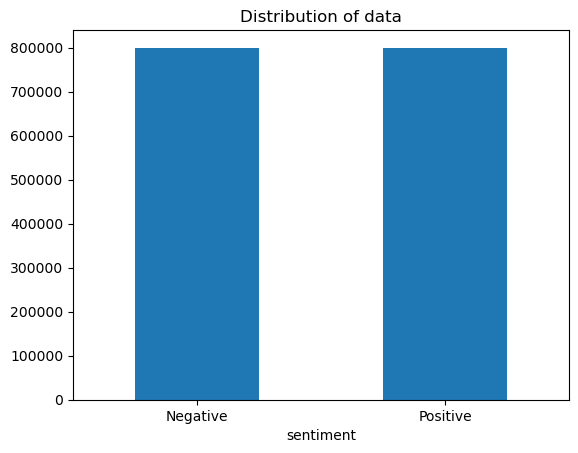

In [12]:
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False, color='#1F77B4')
ax.set_xticklabels(['Negative','Positive'], rotation=0)


In [13]:
# Storing data in lists.
text, sentiment = list(dataset['tweet']), list(dataset['sentiment'])

# Print the first 5 elements of the 'text' and 'sentiment' lists
print(dataset[['tweet', 'sentiment']].head())
print("")
print(dataset[['tweet', 'sentiment']].tail())

                                               tweet  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1  is upset that he can't update his Facebook by ...          0
2  @Kenichan I dived many times for the ball. Man...          0
3    my whole body feels itchy and like its on fire           0
4  @nationwideclass no, it's not behaving at all....          0

                                                     tweet  sentiment
1599995  Just woke up. Having no school is the best fee...          1
1599996  TheWDB.com - Very cool to hear old Walt interv...          1
1599997  Are you ready for your MoJo Makeover? Ask me f...          1
1599998  Happy 38th Birthday to my boo of alll time!!! ...          1
1599999  happy #charitytuesday @theNSPCC @SparksCharity...          1


In [14]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [15]:
#from re and wordNetLemmatizer

#changing into lowercase
def to_lowercase(text):
    return text.lower()

#replacing url texts
def replace_urls(text):
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    return re.sub(url_pattern, ' URL', text)

#replacing emoji with texts
def replace_emojis(text, emojis):
    for emoji in emojis.keys():
        text = text.replace(emoji, "EMOJI" + emojis[emoji])
    return text

#replacing mentions like "@"
def replace_mentions(text):
    user_pattern = '@[^\s]+'
    return re.sub(user_pattern, ' USER', text)

#replacing non aplhanumeric words
def replace_non_alphanumeric(text):
    alpha_pattern = "[^a-zA-Z0-9]"
    return re.sub(alpha_pattern, " ", text)

#replacing consecutive letters like letterrrrr
def replace_consecutive_letters(text):
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"
    return re.sub(sequence_pattern, seq_replace_pattern, text)

In [16]:
# Function to lemmatize each word in the text
def lemmatize_text(text, lemmatizer):
    words = ''
    for word in text.split():
        if len(word) > 1:
            word = lemmatizer.lemmatize(word)
            words += (word + ' ')
    return words


#Function to preprocess a list of text data
def preprocess(textdata, emojis):
    processed_text = []
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    for tweet in textdata:
        tweet = to_lowercase(tweet)  # Convert text to lowercase
        tweet = replace_urls(tweet)  # Replace URLs with 'URL'
        tweet = replace_emojis(tweet, emojis)  # Replace emojis
        tweet = replace_mentions(tweet)  # Replace mentions with 'USER'
        tweet = replace_non_alphanumeric(tweet)  # Replace non-alphanumeric characters
        tweet = replace_consecutive_letters(tweet)  # Replace consecutive letters
        tweet = lemmatize_text(tweet, lemmatizer)  # Lemmatize the text
        
        # Remove stopwords
        tweet_tokens = tweet.split()
        tweet = ' '.join([word for word in tweet_tokens if word not in stop_words])
        
        processed_text.append(tweet)  # Append the preprocessed text to the result

    return processed_text

In [17]:
# Sample text data
sample_text_data = [
    "Check out this awesome website: http://example.com",
    "I love this movie 😍",
    "@username mentioned me in a tweet! Thanks!",
    "123-456-7890 is my phone number!",
    "Too many consecutive letterssss in this word.",
    "The cats are running. They should be lemmatized.",
]

# Sample emojis mapping
sample_emojis = {
    "😍": "heart_eyes",
}

# Preprocess the sample text data
processed_text_data = preprocess(sample_text_data, sample_emojis)

# Print the original and processed text
for original, processed in zip(sample_text_data, processed_text_data):
    print(f"Original: {original}")
    print(f"Processed: {processed}\n")

Original: Check out this awesome website: http://example.com
Processed: check awesome website URL

Original: I love this movie 😍
Processed: love movie EMOJIheart eye

Original: @username mentioned me in a tweet! Thanks!
Processed: USER mentioned tweet thanks

Original: 123-456-7890 is my phone number!
Processed: 123 456 7890 phone number

Original: Too many consecutive letterssss in this word.
Processed: many consecutive letters word

Original: The cats are running. They should be lemmatized.
Processed: cat running lemmatized



The text variable likely contains a list of text data (tweets or similar), 
and emojis is a dictionary mapping emojis to their corresponding text representations.
The script measures the time taken to preprocess the text data and
prints a message indicating that the preprocessing is complete.

Implementing preprocess(text, emojis) function in the dataset

In [18]:
import time
t = time.time()
processedtext = preprocess(text, emojis)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')


Text Preprocessing complete.
Time Taken: 128 seconds


In [19]:
df = pd.DataFrame({
    'text': processedtext,
    'sentiment': sentiment
})

# Display the first few rows of the DataFrame
print(df.head())
print("")
print(df.tail())

                                                text  sentiment
0  USER URL aww bummer shoulda got david carr thi...          0
1  upset update facebook texting might cry result...          0
2  USER dived many time ball managed save 50 rest...          0
3                    whole body feel itchy like fire          0
4                              USER behaving mad see          0

                                                    text  sentiment
1599995                    woke school best feeling ever          1
1599996      thewdb com cool hear old walt interview URL          1
1599997                   ready mojo makeover ask detail          1
1599998  happy 38th birthday boo time tupac amaru shakur          1
1599999              happy charitytuesday USER USER USER          1


# Analysing data by plotting word clouds for negative and positive tweets


### Word Cloud for Positive Tweets

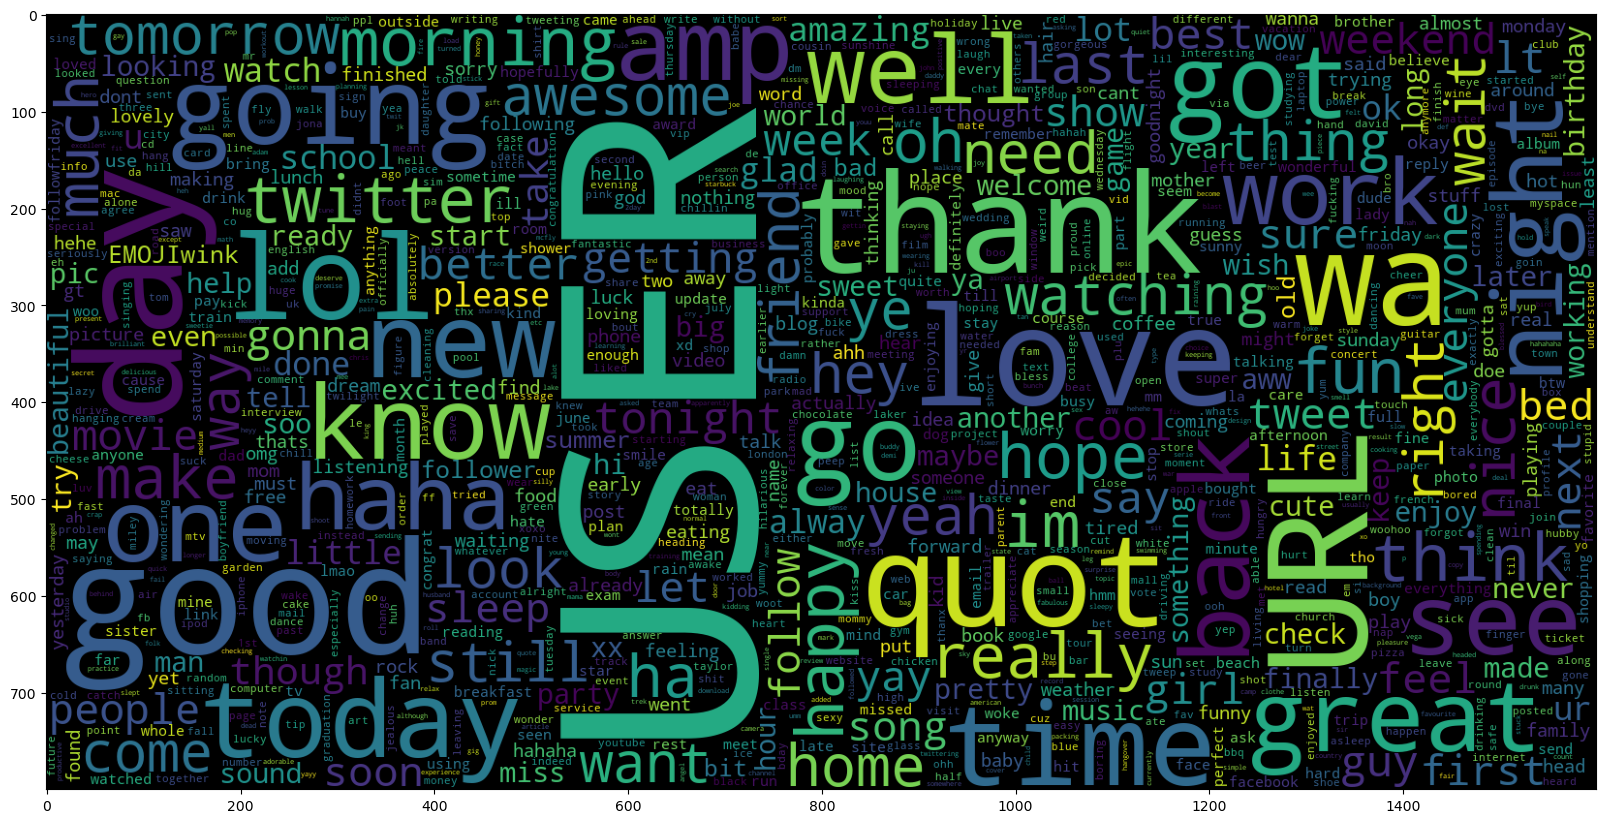

In [20]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Word Cloud for Negative Tweets

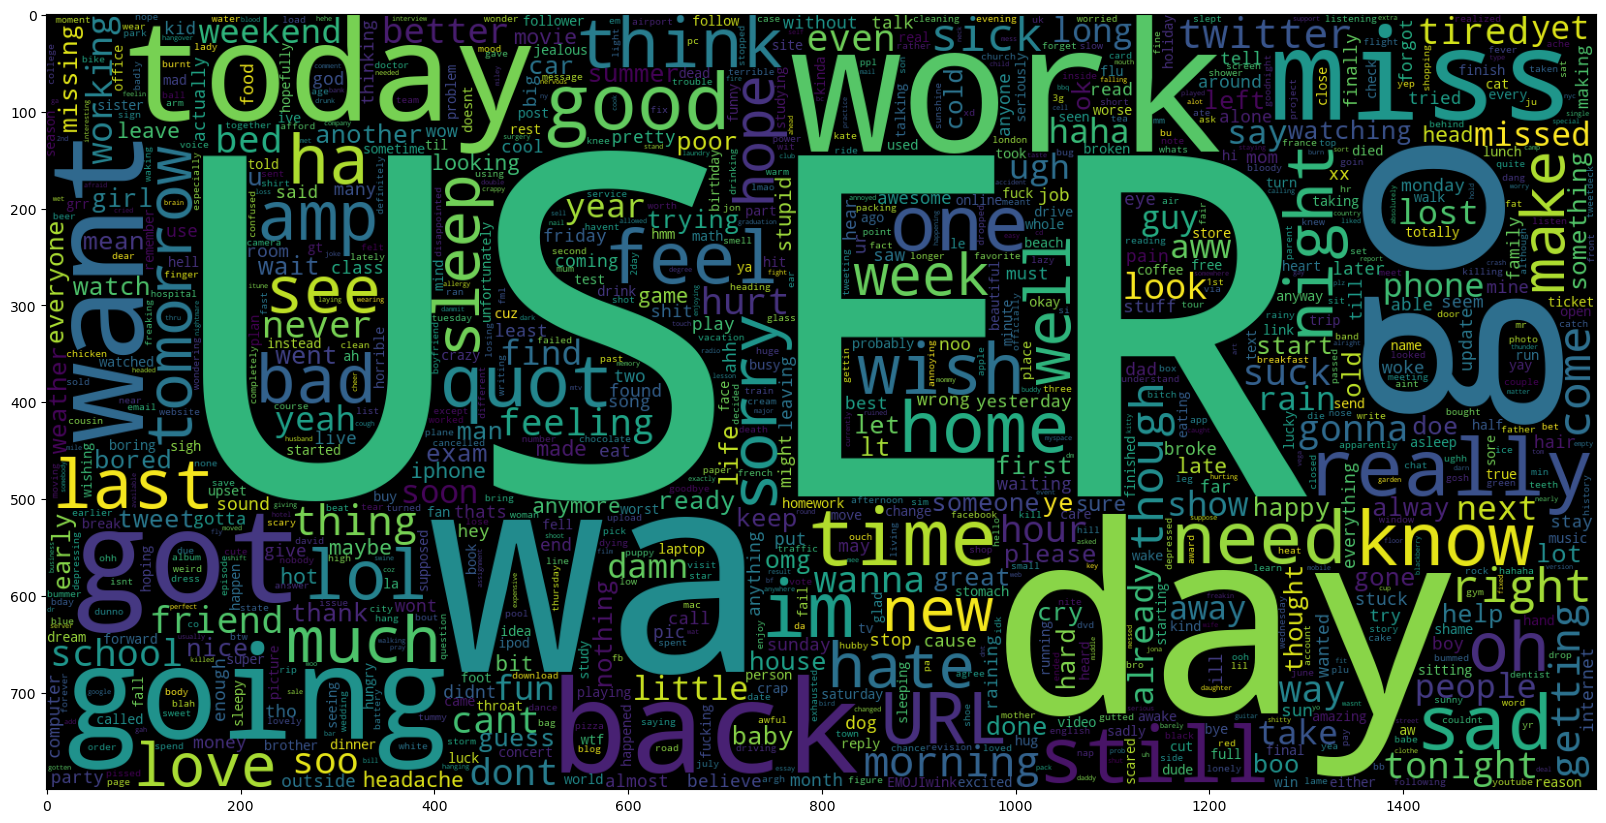

In [21]:
data_neg = processedtext[:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)


# Splitting data  into training and test data

#### Training Data: The dataset upon which the model would be trained on. Contains 95% data.
#### Test Data: The dataset upon which the model would be tested against. Contains 5% data.

In [22]:
# test_size: It specifies the proportion of the dataset to include in the test split. 
# In this case, 5% of the data will be used for testing (test_size=0.05).


X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 0)
print(f'Data Split done')

Data Split done


# TF- IDF Vectoriser

#### F-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

#### ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

#### max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [23]:
# Initialize the TfidfVectorizer with specified parameters
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')

# Print the number of feature words (terms) in the vocabulary
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


### Transforming the dataset
##### Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [24]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


# Creating models

In [25]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # Define categories, group names and percentage value for the confusion matrix
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    #creating lable for confusion matrix
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Plot the Confusion Matrix using a heatmap
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    # Set labels and title for the Confusion Matrix plot
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
   

## Bernoulli Naive Bayes Model

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



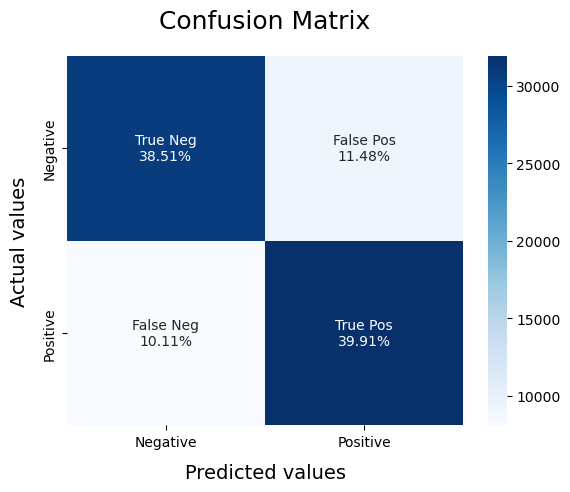

In [26]:
# Create a Bernoulli Naive Bayes model with a specified alpha value
BNBmodel = BernoulliNB(alpha = 2)

# Train the model on the training data
BNBmodel.fit(X_train, y_train)

# Evaluate the model using the model_Evaluate function
model_Evaluate(BNBmodel)

## LinearSVC Model

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



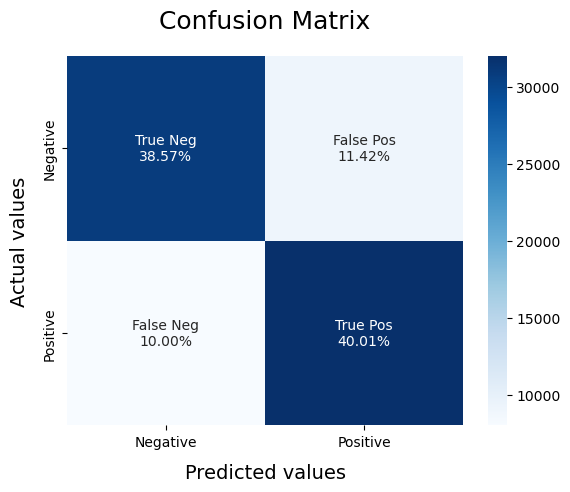

In [27]:
# Create a LinearSVC Model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

## Logistic Regression Model

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



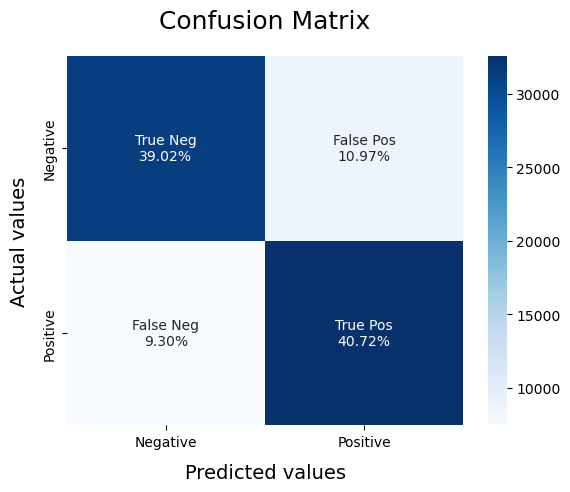

In [28]:
#creating a Logistic Regression Model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly 80% accuracy while classifying the sentiment of a tweet.

Although it should also be noted that the BernoulliNB Model is the fastest to train and predict on. It also achieves 78% accuracy while calssifying.

tuning hyperparameter for Naive Bayes BernoulliNB

,Hyperparameters,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,{'alpha': 0.1},0.780937,0.775591,0.790808,0.783125,"[[30834, 9155], [8370, 31641]]"
1,{'alpha': 0.5},0.783600,0.777650,0.794482,0.785976,"[[30900, 9089], [8223, 31788]]"
2,{'alpha': 1},0.784175,0.777561,0.796256,0.786797,"[[30875, 9114], [8152, 31859]]"
3,{'alpha': 1.5},0.784338,0.777253,0.797281,0.787139,"[[30847, 9142], [8111, 31900]]"
4,{'alpha': 2},0.784125,0.776580,0.797931,0.787111,"[[30804, 9185], [8085, 31926]]"
5,{'alpha': 2.5},0.784713,0.776580,0.799580,0.787912,"[[30785, 9204], [8019, 31992]]"
6,{'alpha': 3},0.784462,0.776083,0.799805,0.787765,"[[30756, 9233], [8010, 32001]]"
7,{'alpha': 3.5},0.784637,0.775838,0.800755,0.788099,"[[30732, 9257], [7972, 32039]]"
8,{'alpha': 4},0.784550,0.775573,0.801005,0.788084,"[[30715, 9274], [7962, 32049]]"
9,{'alpha': 4.5},0.784250,0.774990,0.801255,0.787903,"[[30681, 9308], [7952, 32059]]"


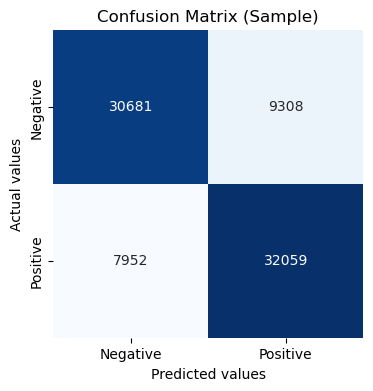

Best Hyperparameters for BNB (F1-Score): {'alpha': 3.5}
Best Score for BNB (F1-Score): 0.7880994256337093

Best Hyperparameters for BNB (Precision): {'alpha': 0.5}
Best Score for BNB (Precision): 0.7776500232404531

Best Hyperparameters for BNB (Recall): {'alpha': 4.5}
Best Score for BNB (Recall): 0.8012546549698832

Best Hyperparameters for BNB (Accuracy): {'alpha': 2.5}
Best Score for BNB (Accuracy): 0.7847125


In [29]:
# Define hyperparameter grid for BNB
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
}

# Generate all combinations of hyperparameters
param_combinations_bnb = list(ParameterGrid(param_grid_bnb))

# Initialize BNB model
bnb_model = BernoulliNB()

# Initialize lists to store results
results_bnb = []

# Iterate over hyperparameter combinations
for params in param_combinations_bnb:
    # Set hyperparameters
    bnb_model.set_params(**params)

    # Fit the model
    bnb_model.fit(X_train, y_train)

    # Predict on Test Set
    y_pred_bnb = bnb_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_bnb)
    precision = precision_score(y_test, y_pred_bnb)
    recall = recall_score(y_test, y_pred_bnb)
    f1 = f1_score(y_test, y_pred_bnb)

    # Compute confusion matrix
    confusion_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)

    # Store results in a dictionary
    result_dict = {
        'Hyperparameters': str(params),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix_bnb
    }

    # Append results to the list
    results_bnb.append(result_dict)

# Create a DataFrame from the results list
results_df_bnb = pd.DataFrame(results_bnb)

# Display the results DataFrame
display(results_df_bnb)

# Display confusion matrix with heatmap and labels
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_bnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix (Sample)")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

# Find the row with the highest F1-Score
best_f1_row = results_df_bnb.iloc[results_df_bnb['F1-Score'].idxmax()]

# Find the row with the highest Precision
best_precision_row = results_df_bnb.iloc[results_df_bnb['Precision'].idxmax()]

# Find the row with the highest Recall
best_recall_row = results_df_bnb.iloc[results_df_bnb['Recall'].idxmax()]

# Find the row with the highest Accuracy
best_accuracy_row = results_df_bnb.iloc[results_df_bnb['Accuracy'].idxmax()]

# Print best hyperparameters and corresponding scores for F1-Score, Precision, Recall, and Accuracy
best_params_f1 = best_f1_row['Hyperparameters']
best_score_f1 = best_f1_row['F1-Score']

best_params_precision = best_precision_row['Hyperparameters']
best_score_precision = best_precision_row['Precision']

best_params_recall = best_recall_row['Hyperparameters']
best_score_recall = best_recall_row['Recall']

best_params_accuracy = best_accuracy_row['Hyperparameters']
best_score_accuracy = best_accuracy_row['Accuracy']

print(f"Best Hyperparameters for BNB (F1-Score): {best_params_f1}")
print(f"Best Score for BNB (F1-Score): {best_score_f1}")
print("")
print(f"Best Hyperparameters for BNB (Precision): {best_params_precision}")
print(f"Best Score for BNB (Precision): {best_score_precision}")
print("")
print(f"Best Hyperparameters for BNB (Recall): {best_params_recall}")
print(f"Best Score for BNB (Recall): {best_score_recall}")
print("")
print(f"Best Hyperparameters for BNB (Accuracy): {best_params_accuracy}")
print(f"Best Score for BNB (Accuracy): {best_score_accuracy}")

tuning hyperparameter for LinearSVC

,Hyperparameters,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,{'C': 0.1},0.798188,0.786342,0.819025,0.802350,"[[31085, 8904], [7241, 32770]]"
1,{'C': 0.5},0.791913,0.782460,0.808803,0.795413,"[[30992, 8997], [7650, 32361]]"
2,{'C': 1},0.785825,0.778005,0.800055,0.788876,"[[30855, 9134], [8000, 32011]]"
3,{'C': 1.5},0.780525,0.773490,0.793557,0.783395,"[[30691, 9298], [8260, 31751]]"
4,{'C': 2},0.777438,0.770884,0.789708,0.780182,"[[30598, 9391], [8414, 31597]]"
5,{'C': 2.5},0.774837,0.768766,0.786309,0.777439,"[[30526, 9463], [8550, 31461]]"
6,{'C': 3},0.772637,0.766812,0.783734,0.775181,"[[30453, 9536], [8653, 31358]]"
7,{'C': 3.5},0.770837,0.765142,0.781760,0.773362,"[[30388, 9601], [8732, 31279]]"
8,{'C': 4},0.769138,0.763633,0.779761,0.771613,"[[30332, 9657], [8812, 31199]]"
9,{'C': 4.5},0.767250,0.761881,0.777686,0.769703,"[[30264, 9725], [8895, 31116]]"


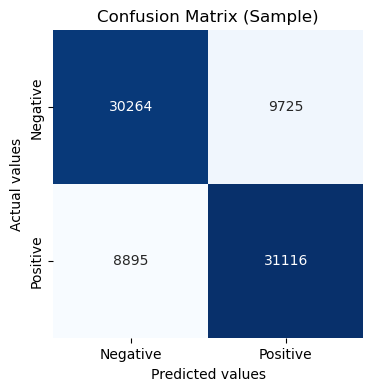

Best Hyperparameters for LinearSVC (F1-Score): {'C': 0.1}
Best Score for LinearSVC (F1-Score): 0.8023504927465264

Best Hyperparameters for LinearSVC (Precision): {'C': 0.1}
Best Score for LinearSVC (Precision): 0.7863416038777176

Best Hyperparameters for LinearSVC (Recall): {'C': 0.1}
Best Score for LinearSVC (Recall): 0.8190247681887481

Best Hyperparameters for LinearSVC (Accuracy): {'C': 0.1}
Best Score for LinearSVC (Accuracy): 0.7981875


In [30]:
# Define hyperparameter grid for SVC
param_grid_svc = {
    'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5],
}

# Generate all combinations of hyperparameters
param_combinations_svc = list(ParameterGrid(param_grid_svc))

# Initialize SVC model
svc_model = LinearSVC()

# Initialize lists to store results
results_svc = []

# Initialize best F1-Score, Precision, Recall, and Accuracy
best_f1_svc = 0.0
best_precision_svc = 0.0
best_recall_svc = 0.0
best_accuracy_svc = 0.0

# Iterate over hyperparameter combinations
for params in param_combinations_svc:
    # Set hyperparameters
    svc_model.set_params(**params)

    # Fit the model
    svc_model.fit(X_train, y_train)

    # Predict on Test Set
    y_pred_svc = svc_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_svc)
    precision = precision_score(y_test, y_pred_svc)
    recall = recall_score(y_test, y_pred_svc)
    f1 = f1_score(y_test, y_pred_svc)

    # Compute confusion matrix
    confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

    # Store results in a dictionary
    result_dict = {
        'Hyperparameters': str(params),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix_svc  # Keep the confusion matrix as is
    }

    # Append results to the list
    results_svc.append(result_dict)
    
    # Update best metrics if the current model has higher values
    if f1 > best_f1_svc:
        best_f1_svc = f1
        best_params_f1_svc = params

    if precision > best_precision_svc:
        best_precision_svc = precision
        best_params_precision_svc = params

    if recall > best_recall_svc:
        best_recall_svc = recall
        best_params_recall_svc = params

    if accuracy > best_accuracy_svc:
        best_accuracy_svc = accuracy
        best_params_accuracy_svc = params

# Create a DataFrame from the results list
results_df_svc = pd.DataFrame(results_svc)

# Display the results DataFrame
display(results_df_svc)

# Display confusion matrix with heatmap and labels
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix (Sample)")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

# Print best hyperparameters and corresponding scores for F1-Score, Precision, Recall, and Accuracy
print(f"Best Hyperparameters for LinearSVC (F1-Score): {best_params_f1_svc}")
print(f"Best Score for LinearSVC (F1-Score): {best_f1_svc}")
print("")
print(f"Best Hyperparameters for LinearSVC (Precision): {best_params_precision_svc}")
print(f"Best Score for LinearSVC (Precision): {best_precision_svc}")
print("")
print(f"Best Hyperparameters for LinearSVC (Recall): {best_params_recall_svc}")
print(f"Best Score for LinearSVC (Recall): {best_recall_svc}")
print("")
print(f"Best Hyperparameters for LinearSVC (Accuracy): {best_params_accuracy_svc}")
print(f"Best Score for LinearSVC (Accuracy): {best_accuracy_svc}")

tuning hyperparameter for Logistic Regression model

,Hyperparameters,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,"{'C': 0.1, 'max_iter': 100}",0.785763,0.775752,0.804079,0.789662,"[[30689, 9300], [7839, 32172]]"
1,"{'C': 0.1, 'max_iter': 200}",0.785763,0.775712,0.804154,0.789677,"[[30686, 9303], [7836, 32175]]"
2,"{'C': 0.1, 'max_iter': 300}",0.785763,0.775712,0.804154,0.789677,"[[30686, 9303], [7836, 32175]]"
3,"{'C': 0.1, 'max_iter': 400}",0.785763,0.775712,0.804154,0.789677,"[[30686, 9303], [7836, 32175]]"
4,"{'C': 0.1, 'max_iter': 500}",0.785763,0.775712,0.804154,0.789677,"[[30686, 9303], [7836, 32175]]"
5,"{'C': 0.5, 'max_iter': 100}",0.795150,0.784910,0.813276,0.798841,"[[31072, 8917], [7471, 32540]]"
6,"{'C': 0.5, 'max_iter': 200}",0.796362,0.786114,0.814426,0.800020,"[[31123, 8866], [7425, 32586]]"
7,"{'C': 0.5, 'max_iter': 300}",0.796375,0.786050,0.814576,0.800059,"[[31118, 8871], [7419, 32592]]"
8,"{'C': 0.5, 'max_iter': 400}",0.796288,0.786014,0.814401,0.799956,"[[31118, 8871], [7426, 32585]]"
9,"{'C': 0.5, 'max_iter': 500}",0.796288,0.786014,0.814401,0.799956,"[[31118, 8871], [7426, 32585]]"


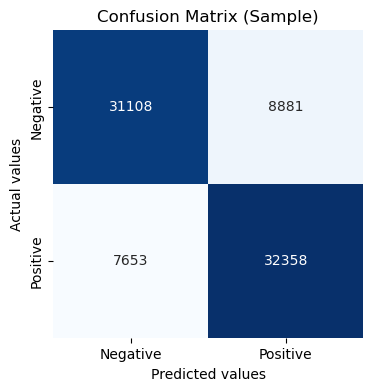

Best Hyperparameters for Logistic Regression (F1-Score): {'C': 1, 'max_iter': 200}
Best Score for Logistic Regression (F1-Score): 0.8018126442992582

Best Hyperparameters for Logistic Regression (Precision): {'C': 1, 'max_iter': 300}
Best Score for Logistic Regression (Precision): 0.7884410940369189

Best Hyperparameters for Logistic Regression (Recall): {'C': 1.5, 'max_iter': 300}
Best Score for Logistic Regression (Recall): 0.8159756067081553

Best Hyperparameters for Logistic Regression (Accuracy): {'C': 1, 'max_iter': 300}
Best Score for Logistic Regression (Accuracy): 0.7983125


In [31]:

# Define hyperparameter grid for LR
param_grid_lr = {
    'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5],
    'max_iter': [100, 200, 300, 400, 500],
}

# Generate all combinations of hyperparameters
param_combinations_lr = list(ParameterGrid(param_grid_lr))

# Initialize LR model
lr_model = LogisticRegression()

# Initialize lists to store results
results_lr = []

# Initialize best F1-Score, Precision, Recall, and Accuracy
best_f1_lr = 0.0
best_precision_lr = 0.0
best_recall_lr = 0.0
best_accuracy_lr = 0.0


# Iterate over hyperparameter combinations
for params in param_combinations_lr:
    # Set hyperparameters
    lr_model.set_params(**params)

    # Fit the model
    lr_model.fit(X_train, y_train)

    # Predict on Test Set
    y_pred_lr = lr_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr)
    recall = recall_score(y_test, y_pred_lr)
    f1 = f1_score(y_test, y_pred_lr)

    # Compute confusion matrix
    confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

    # Store results in a dictionary
    result_dict = {
        'Hyperparameters': str(params),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix_lr  # Keep the confusion matrix as is
    }

    # Append results to the list
    results_lr.append(result_dict)
    
    # Update best metrics if the current model has higher values
    if f1 > best_f1_lr:
        best_f1_lr = f1
        best_params_f1_lr = params

    if precision > best_precision_lr:
        best_precision_lr = precision
        best_params_precision_lr = params

    if recall > best_recall_lr:
        best_recall_lr = recall
        best_params_recall_lr = params

    if accuracy > best_accuracy_lr:
        best_accuracy_lr = accuracy
        best_params_accuracy_lr = params


# Create a DataFrame from the results list
results_df_lr = pd.DataFrame(results_lr)

# Display the results DataFrame
display(results_df_lr)

# Display confusion matrix with heatmap and labels
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix (Sample)")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

# Print best hyperparameters and corresponding scores for F1-Score, Precision, Recall, and Accuracy
print(f"Best Hyperparameters for Logistic Regression (F1-Score): {best_params_f1_lr}")
print(f"Best Score for Logistic Regression (F1-Score): {best_f1_lr}")
print("")
print(f"Best Hyperparameters for Logistic Regression (Precision): {best_params_precision_lr}")
print(f"Best Score for Logistic Regression (Precision): {best_precision_lr}")
print("")
print(f"Best Hyperparameters for Logistic Regression (Recall): {best_params_recall_lr}")
print(f"Best Score for Logistic Regression (Recall): {best_recall_lr}")
print("")
print(f"Best Hyperparameters for Logistic Regression (Accuracy): {best_params_accuracy_lr}")
print(f"Best Score for Logistic Regression (Accuracy): {best_accuracy_lr}")

Saving the models

We're using PICKLE to save Vectoriser and BernoulliNB, Logistic Regression Model for later use.

In [32]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

Testing the models

In [33]:
def load_models():
    
    # Loading the vectoriser.
    file = open('vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    # Loading the LR Model.
    file = open('Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

#to predict the sentiment
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text, emojis))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May you love yourself.",
            "Mr. Stark, I feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                        text sentiment
0             I hate twitter  Negative
1     May you love yourself.  Positive
2  Mr. Stark, I feel so good  Positive
